In [1]:
from traitlets.config.manager import BaseJSONConfigManager
cm = BaseJSONConfigManager()
cm.update('livereveal', {
              'theme': 'sky',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
            'scroll': True
})

{'theme': 'sky',
 'transition': 'zoom',
 'start_slideshow_at': 'selected',
 'scroll': True}

# Лекция 1. Арифметика чисел с плавающей точкой. Векторы и операции над ними. Векторные нормы.

## План на сегодня

- Арифметика чисел с фиксированной и плавающей точкой
- Векторы, зачем они нужны и что с ними можно делать
- Функции и их суперпозиции
- Векторные нормы

## Представление чисел 

- Числа бывают
    - целые
    - рациональные, то есть представимые в виде обыкновенной дроби
    - иррациональные, то есть непредставимые в таком виде, например $\sqrt{2}$
    - действительные, то есть объединение рациональных и иррацинальных чисел

- Действительные числа обозначают различные величины: вероятности, массы, скорости, длины...

- С помощью действительных чисел описываются сложные объекты, возникающие в реальных задачах, которые решаются методами машинного обучения

- Важно знать, как действительные числа представляются в компьютере, который оперирует только битами, то есть последовательностями из 0 и 1

### Представление с фиксированной точкой

- Наиболее очевидный формат представления чисел – это формат чисел с **фиксированной точкой**, также известный как **Qm.n** формат

- Число **Qm.n** лежит в отрезке $[-(2^m), 2^m - 2^{-n}]$ и его точность $2^{-n}$.

- Общий размер памяти для хранения такого числа $m + n + 1$ бит:
    - n бит на дробную часть
    - m бит на целую часть
    - 1 бит на знак

- Диапазон чисел, представимых таким образом, ограничен.

### Пример

- Рассмотрим два числа $18.5$ и $6.75$
- Их бинарная запись: 
    - $18.5 = 1 \cdot 2^{-1} + 0\cdot 2^0 + 1 \cdot 2^1 + 0 \cdot 2^2 + 0 \cdot 2^3 + 1 \cdot 2^4 + 0 \cdot 2^5 \to 010010.100000$
    - $6.75 = 1 \cdot 2^{-2} + 1 \cdot 2^{-1} + 0\cdot 2^0 + 1 \cdot 2^1 + 1 \cdot 2^2 + 0 \cdot 2^3 + 0 \cdot 2^4 + 0 \cdot 2^5 \to 000110.110000$
- Сложим их поразрядно: $010010.100000 + 000110.110000 = 011001.010000 \to 2^{-2} + 1 + 8 + 16 = 25.25$

### Числа с плавающей точкой (floating point numbers)

Числа в памяти компьютера обычно представляются в виде **чисел с плавающей точкой.**

Число с плавающей точкой представляется в виде

$$ \textrm{number} = \textrm{significand} \times \textrm{base}^{\textrm{exponent}},$$

где *significand* – целое число (aka мантисса), *base* – натуральное число (основание) и *exponent* – целое число (может быть отрицательным), например

$$ 1.2 = 12 \cdot 10^{-1}.$$

### Формат фиксированной точки vs формат плавающей точки

**Q**: какие достоинства и недостатки у рассмотренных форматов представления действительных чисел?

**A**: они подходят для большинства случаев.

- Однако, числа с фиксированной точкой представляют числа из фиксированного интервала и ограничивают **абсолютную** точность.

- Числа с плавающей точкой представлют числа с **относительной** точностью и удобны для случаев, когда числа, которые участвуют в вычислениях, имеют различный порядок (например $10^{-1}$ и $10^{5}$).

- На практике, если скорость не критически важна, стоит использовать float32 или float64.

### IEEE 754
В современных компьютерах представление чисел в виде чисел с плавающей точкой регулируется стандартом [IEEE 754](https://en.wikipedia.org/wiki/IEEE_floating_point), который был опубликован в **1985 г.** До этого компьютеры обрабатывали числа с плавающей точкой по-разному!

IEEE 754 содержит следующие элементы:
- Представление чисел с плавающей точкой (как было описано выше), $(-1)^s \times c \times b^q$.
- Две бесконечности $+\infty$ and $-\infty$
- Два типа **NaN**: "тихий" NaN (**qNaN**) and сигнализирующий NaN (**sNaN**) 
    - qNaN не бросает исключение на уровне блока, производящего операции с плавающей точкой, (floating point unit – FPU), до того как вы проверите результат вычислений
    - значение sNaN бросает исключение из FPU, если вы используете это значение в вычислениях. Этот тип NaN может быть полезен для инициализиции
    - C++11 имеет [стандартный интерфейс](https://en.cppreference.com/w/cpp/numeric/math/nan) для создания разных типов NaN
- Правила **округления**
- Правила для операций типа $\frac{0}{0}, \frac{1}{-0}, \ldots$

Возможные значения определяются через
- основание $b$
- точность $p$ - число цифр в записи
- максимально возможное значение $e_{\max}$

и имеет следующие ограничения

- $ 0 \leq c \leq b^p - 1$
- $1 - e_{\max} \leq q + p - 1 \leq e_{\max}$ 

### Два наиболее используемых формата: single & double

Наиболее часто используются следующие форматы: **binary32** и **binary64** (также известные как **single** и **double**).
В последнее время популярность набирают вычисления с половинной точностью **binary16**.

| Формальное название | Другое название | Основание | Число цифр в записи | Emin | Emax |
|------|----------|----------|-------|------|------|
|binary16| half precision  | 2 | 11 | -14 | + 15 |  
|binary32| single precision | 2 | 24 | -126 | + 127 |  
|binary64| double precision | 2|  53|  -1022| +1023|


<img src="./double64.png">


### Примеры

- Для числа +0
    - *sign* - 0
    - *exponent* - 00000000000
    - *fraction* - все нули
- Для числа -0
    - *sign* - 1
    - *exponent* - 00000000000
    - *fraction* - все нули
- Для +infinity
    - *sign* - 0
    - *exponent* - 11111111111
    - *fraction* - все нули

**Q**: Как будет выглядеть -infinity и NaN ?

### Точность и размер памяти 

**Относительная точность** для различных форматов

- половинная точность или float16: $10^{-3} - 10^{-4}$,
- одинарная точность или float32: $10^{-7}-10^{-8}$,
- двойная точность или float64: $10^{-14}-10^{-16}$.

<font color='red'> Важное замечание 1: </font> **float16** занимает **2 байта**, **float32** занимает **4 байта**, **float64** занимает **8 байт**

<font color='red'> Важное замечание 2: </font> Обычно в "железе" поддерживается одинарная и двойная точность. Для обучения нейросетей становится популярным использовать половинную точность или даже меньше... Подробности [тут](https://arxiv.org/pdf/1905.12334.pdf)

### Потеря значимых цифр

- Многие операции приводят к потере значимых цифр в результате, этот эффект называется [loss of significance](https://en.wikipedia.org/wiki/Loss_of_significance)
- Например, при вычитании двух близких больших чисел результат будет иметь меньше правильных цифр, чем исходные числа

In [57]:
a = np.float64(123456789999999.11)
print(a)
b = np.float64(123456789999998.1)
print(b)
c = a - b
print('{0:10.17f}'.format(c))

123456789999999.11
123456789999998.1
1.01562500000000000


### Примеры привычных операций с числами в разной точности

### Пример 1: потеря точности при делении

In [2]:
import numpy as np

print("Consider float32")
c = np.float32(0.925924589693)
print(c)
a = np.float32(8.9)
b = np.float32(c / a)
print('{0:10.16f}'.format(b))
print("Approximation error", a * b - c)

print("Consider float64")
c = np.float64(0.925924589693)
print(c)
a = np.float64(8.9)
b = np.float64(c / a)
print('{0:10.16f}'.format(b))
print("Approximation error", a * b - c)

Consider float32
0.9259246
0.1040364727377892
Approximation error -5.9604645e-08
Consider float64
0.925924589693
0.1040364707520225
Approximation error 0.0


### Пример 2: потеря точности при извлечении корня

In [93]:
a = np.float32(1.45678452)
b = np.sqrt(a, dtype=np.float32)
print('{0:10.16f}'.format(b ** 2 - a))

0.0000000946261594


### Пример 3: потеря точности при вычислении экспоненты

In [28]:
a = np.array(2.28827272710, dtype=np.float32)
b = np.exp(a)
print(np.log(b) - a)

0.0


### Пример 4: решение квадратного уравнения

In [6]:
a, b, c = np.float32(1), np.float32(1000), np.float32(-0.1)
x1 = (-b - np.sqrt(b*b - 4 * a * c, dtype=np.float32)) / (2 * a)
x2 = (-b + np.sqrt(b*b - 4 * a * c, dtype=np.float32)) / (2 * a)
print(x1, x2)
print(a * x1*x1 + b * x1 + c)
print(a * x2*x2 + b * x2 + c)

-1000.0001220703125 9.1552734375e-05
0.022070325911045074
-0.008447258733212948


###   Q: как вычислять корни устойчиво?

In [7]:
x1 = (-b - np.sqrt(b*b - 4 * a * c, dtype=np.float32)) / (2 * a)
x2 = 2 * c / (-b - np.sqrt(b*b - 4 * a * c, dtype=np.float32))
x1 = -b - x2
print(x1, x2)
print(a * x1*x1 + b * x1 + c)
print(a * x2*x2 + b * x2 + c)

-1000.0000999999893 9.999998928308617e-05
-2.2118911147117615e-09
-2.2070320848666114e-09


## Алгоритм суммирования

Как мы увидели, ошибка округления зависит от алгоритма вычисления.

- Рассмотрим простейшую задачу: дано $n$ чисел с плавающей точкой $x_1, \ldots, x_n$  

- Необходимо вычислить их сумму

$$ S = \sum_{i=1}^n x_i = x_1 + \ldots + x_n.$$

- Простейший алгоритм: складывать числа $x_1, \ldots, x_n$ одно за другим

- Какова ошибка такого алгоритма при работе в неточной арифметике?

## Наивный алгоритм

Сложим числа одно за другим: 

$$y_1 = x_1, \quad y_2 = y_1 + x_2, \quad y_3 = y_2 + x_3, \ldots.$$

- В **худшем случае** ошибка пропорциональна $\mathcal{O}(n)$, в то время как **средне-квадратичная** ошибка $\mathcal{O}(\sqrt{n})$.

- **Алгоритм Кахана** (Kahan algorithm) даёт ошибку в худшем случае $\mathcal{O}(1)$ (то есть она не зависит от $n$).  

- <font color='red'> Можете ли вы найти алгоритм с ошибкой $\mathcal{O}(\log n)$? </font>

## Алгоритм Кахана (Kahan summation)

Следующий алгоритм даёт ошибку $2 \varepsilon + \mathcal{O}(n \varepsilon^2)$, где $\varepsilon$ – машинная точность.
```python
s = 0
c = 0
for i in range(len(x)):
    y = x[i] - c
    t = s + y
    c = (t - s) - y
    s = t
```

In [1]:
import math

import jax.numpy as jnp
import numpy as np
import jax
from numba import jit as numba_jit

n = 10 ** 8
sm = 1e-10
x = jnp.ones(n, dtype=jnp.float32) * sm
x = jax.ops.index_update(x, [0], 1.)
true_sum = 1.0 + (n - 1)*sm
approx_sum = jnp.sum(x)
math_fsum = math.fsum(x)


@jax.jit
def dumb_sum(x):
    s = jnp.float32(0.0)
    def b_fun(i, val):
        return val + x[i] 
    s = jax.lax.fori_loop(0, len(x), b_fun, s)
    return s


@numba_jit(nopython=True)
def kahan_sum_numba(x):
    s = np.float32(0.0)
    c = np.float32(0.0)
    for i in range(len(x)):
        y = x[i] - c
        t = s + y
        c = (t - s) - y
        s = t
    return s

@jax.jit
def kahan_sum_jax(x):
    s = jnp.float32(0.0)
    c = jnp.float32(0.0)
    def b_fun2(i, val):
        s, c = val
        y = x[i] - c
        t = s + y
        c = (t - s) - y
        s = t
        return s, c
    s, c = jax.lax.fori_loop(0, len(x), b_fun2, (s, c))
    return s

k_sum_numba = kahan_sum_numba(np.array(x))
k_sum_jax = kahan_sum_jax(x)
d_sum = dumb_sum(x)
print('Error in np sum: {0:3.1e}'.format(approx_sum - true_sum))
print('Error in Kahan sum Numba: {0:3.1e}'.format(k_sum_numba - true_sum))
print('Error in Kahan sum JAX: {0:3.1e}'.format(k_sum_jax - true_sum))
print('Error in dumb sum: {0:3.1e}'.format(d_sum - true_sum))
print('Error in math fsum: {0:3.1e}'.format(math_fsum - true_sum))

/Users/alex/anaconda3/envs/pytorch/lib/python3.6/site-packages/jax/lib/xla_bridge.py:122: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


Error in np sum: 6.0e-07
Error in Kahan sum Numba: -1.3e-07
Error in Kahan sum JAX: -1.0e-02
Error in dumb sum: -1.0e-02
Error in math fsum: 1.3e-10


## Ещё один пример

In [7]:
import numpy as np
test_list = [1, 1e20, 1, -1e20]
print(math.fsum(test_list))
print(np.sum(test_list))
print(1 + 1e20 + 1 - 1e20)

2.0
0.0
0.0


## Выводы по операциям с числами с плавающей точкой

- Необходимо быть особенно осторожными при работе с числами с плавающей точкой, поскольку операции с ними могут дать неверный ответ из-за ошибок округления.

- Для многих стандартных алгоритмов вопросы устойчивости хорошо изучены и проблемы, связанные с этим, легко обнаруживаются.

## Векторы

- В рамках курса, мы будем работать не с числами, а с векторами и матрицами
- В школе вектором называли направленный отрезок и задавали его координаты
- Мы будем рассматривать векторы как наборы из $n$ чисел в формате плавающей точки и не будем опираться на геометрическую интерпретацию. Однако иногда будем её использовать как иллюстрацию к чисто алгебраическим операциям.
- Количество чисел в векторе $n$ называется его *размерностью*
- Векторы могут быть строками или столбцами. Везде далее будем считать, что вектор является столбцом.

**Примеры:** 
- С помощью векторов можно описывать разные объекты. Например, студент описывается вектором из оценок за пройденные курсы
- Или компания описывается вектором своих показателей прибыли, затрат, выручки, капитализации и прочее
- Вектор может хранить вероятности тех или иных событий. В этом случае все его элементы будут неотрицательны и их сумма равна 1 

### Операции с векторами

- Сложение, вычитание и умножене на число делается **покомпонентно**: $z = ax + y$ значит что $z_i = ax_i + y_i$, где $a$ число, а $x, y$ - векторы
- Между двумя векторами $x, y$ можно вычислить скалярное произведение: $(x, y) = \sum_{i=1}^n x_i y_i$
- С помощью определения скалярного произведения из школы: 

$$(x, y) = \|x\| \|y\| \cos \alpha,$$

где $\alpha$ - угол между векторами, можно определить угол между $n$-мерными векторами как

$$ \cos \alpha = \frac{(x, y)}{\|x\| \|y\|} $$

### Как обобщить понятие длины вектора?

- Длина вектора превращается в его **норму** и обозначается $\| \cdot \|$, то есть норма вектора $x$ обозначается $\|x\|$
- Норма должна удовлетворять следующим свойствам:

    - $\Vert \alpha x \Vert = |\alpha| \Vert x \Vert$
    - $\Vert x + y \Vert \leq \Vert x \Vert + \Vert y \Vert$ (неравенство треугольника)
    - Если $\Vert x \Vert = 0$, то $x = 0$

Расстояние между двумя векторами одной размерности можно определить как норму разности между ними

$$
   d(x, y) = \Vert x - y \Vert.
$$

### Стандартные нормы

Наиболее известная и чаще всего используемая норма – это **евклидова норма**:

$$\Vert x \Vert_2 = \sqrt{\sum_{i=1}^n |x_i|^2},$$

расстояние по которой соответствует расстоянию в реальном мире.

### $p$-норма

Евклидова норма или $2$-норма – это частный случай важного класса $p$-норм:

$$
 \Vert x \Vert_p = \Big(\sum_{i=1}^n |x_i|^p\Big)^{1/p}.
$$

Также важны следующие два частных случая :
- Бесконечная норма или Чебышёвская норма определяется как максимальный модуль элемента вектора $x$: 

$$
\Vert x \Vert_{\infty} = \max_i | x_i|
$$

<img src="chebyshev.jpeg" style="height">

- $L_1$ норма определяется как сумма модулей элементов вектора $x$: 

$$
\Vert x \Vert_1 = \sum_i |x_i|
$$

Расстояние, определённое как $L_1$ норма разности между векторами, называется **Манхэттенским расстоянием**

<img src="manhattan.jpeg" style="height">  


### Вычисление норм в Python

Пакет NumPy содержит всё необходимое для вычисления норм: функция ```np.linalg.norm```.


In [75]:
import numpy as np
n = 100
a = np.ones(n)
b = a + 1e-3 * np.random.randn(n)
print('Relative error in L1 norm:', np.linalg.norm(a - b, 1) / np.linalg.norm(b, 1))
print('Relative error in L2 norm:', np.linalg.norm(a - b) / np.linalg.norm(b))
print('Relative error in Chebyshev norm:', np.linalg.norm(a - b, np.inf) / np.linalg.norm(b, np.inf))

Relative error in L1 norm: 0.0007523487443195382
Relative error in L2 norm: 0.0009699650318095636
Relative error in Chebyshev norm: 0.0023767840287027813


### Единичные диски в различных нормах

- Единичный диск – это множество точек такое что $\Vert x \Vert \leq 1$
- Для евклидовой нормы единичный диск сопадает с обычным диском
- Для других норм единичный диск сильно отличается от привычного нам диска

Text(0.5, 1.0, 'Unit disk in the p-th norm, $p=1$')

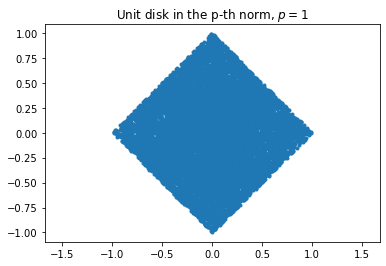

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
p = 1 # Which norm do we use
M = 40000 # Number of sampling points
a = np.random.randn(M, 2)
b = []
for i in range(M):
    if np.linalg.norm(a[i, :], p) <= 1:
        b.append(a[i, :])
b = np.array(b)
plt.plot(b[:, 0], b[:, 1], '.')
plt.axis('equal')
plt.title('Unit disk in the p-th norm, $p={0:}$'.format(p))

## Промежуточные выводы про векторы и операции с ними

- Вектор - упорядоченный набор из $n$ чисел
- Норма вектора - аналог длины, примеры $p$-норм
- Скалярное произведение и угол между векторами

## Функции и их суперпозиции

- Элементарные функции $x^2, \sin x$ и тд
- Обозначение $f: D \to E$, где $D$ область определения, а $E$ область значений
- Например: $f(x) = \sin x$ имеет $D = \mathbb{R}$ и $E = [-1, 1]$

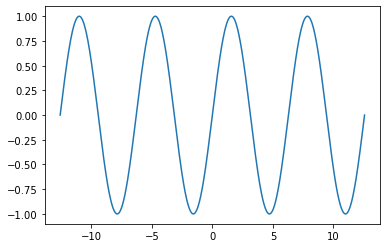

In [81]:
x = np.linspace(-4*np.pi, 4*np.pi, num=1000)
f = np.sin(x)
plt.plot(x, f)

### Многомерные функции

- Функции могут отображать вектор в число, вектор в другой вектор отличной размерности и тд
- Это формализуется заданием множеств $D$ и $E$
- Например, норма является функцией, для которой $D = \mathbb{R}^n$ и $E = \mathbb{R}_+$ так как норма неотрицательная функция

### Функции можно комбинировать. Это называется суперпозиция

- Функция $f(x) = g(h(x))$ называется **суперпозицией** функций $g$ и $h$
- Важно, что $E$ для функции $h$ должно быть подмножеством множества $D$ для $g$
- Например, $f(x) = \| (5x -2)^2 \|_1$ является суперпозицией функций $f_1(x): \mathbb{R}^n \to \mathbb{R}^n$ вида $f_1(x) =5x - 2$, $f_2(y) = y^2$ - поэлементная функция, которая каждый элемент входного вектора возводит в квадрат и $f_3(z) = \|z\|_1$, которая даёт первую норму входного вектора.

### Функции могут зависеть от параметров

- Рассмотрим линейную функцию $f(x) = (c, x) + b$, где вектор $c$ и число $b$ являются параметрами, которые её полностью определяют
- Например в случае линейной функции $c$ определяет вектор нормали, а число $b$ сдвиг относительно 0

### Нейронные сети и суперпозиции функций

- Задачи, для которых обычно используют нейронные сети и другие методы машинного обучения, можно описать выделение некоторой полезной информации из данных о рассматриваемых объектах
- Пример такой задачи - задача классификации, в которой по описанию объекта нужно отнести его к определённому классу
- Например, по анкетным данным клиента банка определить выдавать ли ему кредит или не выдавать - два класса, которые обычно кодируются $\{0, 1\}$ или $\{ +1, -1\}$

**Q**: как формализовать такую задачу?

### Решить задачу значит получить функцию, которая по описанию объекта (вектору) выдаёт метку класса

**Q:** как описать искомую функцию? 

**A:** удобный способ описания - это суперпозиция функций, у которых есть параметры. Эти параметры необходимо задать или получить такими, чтобы метки получаемых классов были верными.

### Нейросеть - это суперпозиция параметрических функций

- Параметры элементарных функций, из которых состоит нейросеть, задаются с помощью чисел с плавающей точкой
- Формат хранения параметров напрямую влияет на то, насколько точно и устойчиво будет вычисляться итоговая метка класса для заданного описания объекта (входного вектора)

### Форматы представления чисел и нейронные сети

- Для быстрой и энергоэффективной работы с нейросетями разработаны специальные форматы хранения чисел (подробности далее)
- Они помогают ускорить получение обученных моделей с некоторой потерей точности промежуточных вычислений

### bfloat16 (Brain Floating Point)

- Этот формат требует 16 битов
    - 1 бит для знака
    - 8 битов для экспоненты
    - 7 bits для мантиссы
    <img src="./bfloat16.png">
- Усечённая одинарная точность из стандарта IEEE
- Какая разница между float32 и bloat16?
- Этот формат используется в Intel FPGA, Google TPU, Xeon CPUs и других платформах

### Tensor Float от Nvidia ([блог об этом формате](https://blogs.nvidia.com/blog/2020/05/14/tensorfloat-32-precision-format/))

- Сравнение с другими форматами

<img src="./tensor_float_cf.png">

- Результаты

<img src="./TF32-BERT.png">

- PyTorch и Tensorflow, поддерживающие этот формат, доступны в [Nvidia NGC](https://ngc.nvidia.com/catalog/all)

## Выводы о числах с плавающей точкой и нейросетях

- Нейросети представляются в виде суперпозиции функций, которые зависят от параметров
- Параметры состоят из наборов чисел с плавающей точкой, которые могут храниться в различных форматах
- Основные характеристики форматов - скорость выполнения элементарных операций, энергоэффективность
- Новые форматы могут нарушать некоторые требования стандарта IEEE при работе на GPU
- Подробный анализ выполнимости стандарта IEEE 754 на GPU от NVIDIA можно найти [здесь](https://docs.nvidia.com/cuda/floating-point/index.html#considerations-for-heterogeneous-world) 

In [14]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()